In [35]:
import numpy as np
import pandas as pd
import re
import numpy
import random

In [36]:
df = pd.read_csv('Dragon_Ball_Data_Set.csv')
df.head(5)

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball


In [37]:
df['Power_Level']

0                          10
1                         1.5
2                           7
3                          30
4                           5
                ...          
1239       22,400,000,000,000
1240      224,000,000,000,000
1241           44,800,000,000
1242      896,000,000,000,000
1243    4,480,000,000,000,000
Name: Power_Level, Length: 1244, dtype: object

In [38]:
df.columns

Index(['Character', 'Power_Level', 'Saga_or_Movie', 'Dragon_Ball_Series'], dtype='object')

In [39]:
df['Power_Level'][0:5]

0     10
1    1.5
2      7
3     30
4      5
Name: Power_Level, dtype: object

In [40]:
df[['Character', 'Power_Level']][0:5]

,Character,Power_Level
0,Goku,10
1,Bulma,1.5
2,Bear Thief,7
3,Master Roshi,30
4,Oolong,5


In [41]:
df_pilaf_saga = df.loc[df['Saga_or_Movie'].str.contains('Emperor Pilaf Saga')]
df_pilaf_saga

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball
5,Yamcha,8.5,Emperor Pilaf Saga,Dragon Ball
6,Puar,4,Emperor Pilaf Saga,Dragon Ball
7,Goku (hungry),8,Emperor Pilaf Saga,Dragon Ball
8,Ox-King,25,Emperor Pilaf Saga,Dragon Ball
9,Chi-chi,6,Emperor Pilaf Saga,Dragon Ball


In [42]:
df_pilaf_saga = df_pilaf_saga[['Character', 'Power_Level']]
df_pilaf_saga

,Character,Power_Level
0,Goku,10
1,Bulma,1.5
2,Bear Thief,7
3,Master Roshi,30
4,Oolong,5
5,Yamcha,8.5
6,Puar,4
7,Goku (hungry),8
8,Ox-King,25
9,Chi-chi,6


In [43]:
df_ps = df_pilaf_saga
df_ps

,Character,Power_Level
0,Goku,10
1,Bulma,1.5
2,Bear Thief,7
3,Master Roshi,30
4,Oolong,5
5,Yamcha,8.5
6,Puar,4
7,Goku (hungry),8
8,Ox-King,25
9,Chi-chi,6


In [44]:
df_ps.describe()

,Character,Power_Level
count,14,14
unique,14,13
top,Oolong,100
freq,1,2


In [45]:
df_ps['Power_Level'].astype('float64')
df_ps

,Character,Power_Level
0,Goku,10
1,Bulma,1.5
2,Bear Thief,7
3,Master Roshi,30
4,Oolong,5
5,Yamcha,8.5
6,Puar,4
7,Goku (hungry),8
8,Ox-King,25
9,Chi-chi,6


In [46]:
df_ps['Power_Level'] = pd.to_numeric(df_ps['Power_Level'])

C:\Users\josuy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_ps

,Character,Power_Level
0,Goku,10.0
1,Bulma,1.5
2,Bear Thief,7.0
3,Master Roshi,30.0
4,Oolong,5.0
5,Yamcha,8.5
6,Puar,4.0
7,Goku (hungry),8.0
8,Ox-King,25.0
9,Chi-chi,6.0


In [48]:
df_ps_pl = df_ps['Power_Level'].sort_values(ascending = False)

In [49]:
df_ps_pl

11    180.0
13    100.0
10    100.0
3      30.0
8      25.0
12     12.0
0      10.0
5       8.5
7       8.0
2       7.0
9       6.0
4       5.0
6       4.0
1       1.5
Name: Power_Level, dtype: float64

In [50]:
df_ps

,Character,Power_Level
0,Goku,10.0
1,Bulma,1.5
2,Bear Thief,7.0
3,Master Roshi,30.0
4,Oolong,5.0
5,Yamcha,8.5
6,Puar,4.0
7,Goku (hungry),8.0
8,Ox-King,25.0
9,Chi-chi,6.0


In [51]:
df_ps['Character'] == 'Bulma'

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: Character, dtype: bool

In [52]:
df_ps['Character'].iloc[1]

'Bulma'

In [53]:
df_ps.loc[df_ps['Character'] == 'Oolong']

,Character,Power_Level
4,Oolong,5.0


In [54]:
df_ps.loc[df_ps['Power_Level'] > 5.0]

,Character,Power_Level
0,Goku,10.0
2,Bear Thief,7.0
3,Master Roshi,30.0
5,Yamcha,8.5
7,Goku (hungry),8.0
8,Ox-King,25.0
9,Chi-chi,6.0
10,Master Roshi (Max power),100.0
11,Master Roshi's Max Power Kamehameha,180.0
12,Goku's Kamehameha,12.0


In [55]:
df_ps.sort_values('Power_Level', ascending = False)

,Character,Power_Level
11,Master Roshi's Max Power Kamehameha,180.0
10,Master Roshi (Max power),100.0
13,Great Ape Goku,100.0
3,Master Roshi,30.0
8,Ox-King,25.0
12,Goku's Kamehameha,12.0
0,Goku,10.0
5,Yamcha,8.5
7,Goku (hungry),8.0
2,Bear Thief,7.0


In [56]:
# I want to find use .describe on anything that has the name "Roshi" or maybe "Goku" instead

df_ps_Goku = df_ps.loc[df_ps['Character'].str.contains('Goku')]

df_ps_Goku.sort_values('Power_Level', ascending = False)

,Character,Power_Level
13,Great Ape Goku,100.0
12,Goku's Kamehameha,12.0
0,Goku,10.0
7,Goku (hungry),8.0


In [57]:
df_ps_Goku.mean()

Power_Level    32.5
dtype: float64

In [58]:
df.head(25)

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball
5,Yamcha,8.5,Emperor Pilaf Saga,Dragon Ball
6,Puar,4,Emperor Pilaf Saga,Dragon Ball
7,Goku (hungry),8,Emperor Pilaf Saga,Dragon Ball
8,Ox-King,25,Emperor Pilaf Saga,Dragon Ball
9,Chi-chi,6,Emperor Pilaf Saga,Dragon Ball


In [59]:
tournament_sagas = df.loc[df['Saga_or_Movie'].str.contains('Tournament Saga')]
tournament_sagas

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
14,Goku,28,Tournament Saga,Dragon Ball
15,Master Roshi,40,Tournament Saga,Dragon Ball
16,Krillin,9,Tournament Saga,Dragon Ball
17,Launch (bad),7,Tournament Saga,Dragon Ball
18,Launch (good),4,Tournament Saga,Dragon Ball
...,...,...,...,...
449,Supreme Kai,"100,000,000,000",Great Saiyaman Saga/World Tournament Saga,Dragon Ball Z
450,Kibito,"20,000,000,000",Great Saiyaman Saga/World Tournament Saga,Dragon Ball Z
451,Gohan (SSJ2),"36,000,000,000",Great Saiyaman Saga/World Tournament Saga,Dragon Ball Z
452,Spopovich,150,Great Saiyaman Saga/World Tournament Saga,Dragon Ball Z


In [60]:
tournament_sagas.head(5)

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
14,Goku,28,Tournament Saga,Dragon Ball
15,Master Roshi,40,Tournament Saga,Dragon Ball
16,Krillin,9,Tournament Saga,Dragon Ball
17,Launch (bad),7,Tournament Saga,Dragon Ball
18,Launch (good),4,Tournament Saga,Dragon Ball


In [61]:
df_db_ts = tournament_sagas.loc[tournament_sagas['Dragon_Ball_Series'] == 'Dragon Ball']
df_db_ts

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
14,Goku,28,Tournament Saga,Dragon Ball
15,Master Roshi,40,Tournament Saga,Dragon Ball
16,Krillin,9,Tournament Saga,Dragon Ball
17,Launch (bad),7,Tournament Saga,Dragon Ball
18,Launch (good),4,Tournament Saga,Dragon Ball
19,Goku (Master Roshi's training),37,Tournament Saga,Dragon Ball
20,Krillin (Master Roshi's training),24,Tournament Saga,Dragon Ball
21,Jackie Chun,50,Tournament Saga,Dragon Ball
22,Yamcha,21,Tournament Saga,Dragon Ball
23,Bacterian,8,Tournament Saga,Dragon Ball


In [62]:
df_db_ts.dtypes

Character             object
Power_Level           object
Saga_or_Movie         object
Dragon_Ball_Series    object
dtype: object

In [63]:
#df_ps['Power_Level'] = pd.to_numeric(df_ps['Power_Level'])

In [64]:
df_db_ts.describe()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
count,19,19,19,19
unique,19,18,1,1
top,Krillin (Master Roshi's training),24,Tournament Saga,Dragon Ball
freq,1,2,19,19


In [65]:
df_db_ts.mean()

Power_Level    1.495250e+35
dtype: float64

In [66]:
df_db_ts.dtypes

Character             object
Power_Level           object
Saga_or_Movie         object
Dragon_Ball_Series    object
dtype: object

In [67]:
df_db_ts = tournament_sagas.loc[tournament_sagas['Dragon_Ball_Series'] == 'Dragon Ball']
df_db_ts


df_db_ts['Power_Level'] = df_db_ts['Power_Level'].astype('float64')

C:\Users\josuy\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [68]:
df_db_ts

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
14,Goku,28.0,Tournament Saga,Dragon Ball
15,Master Roshi,40.0,Tournament Saga,Dragon Ball
16,Krillin,9.0,Tournament Saga,Dragon Ball
17,Launch (bad),7.0,Tournament Saga,Dragon Ball
18,Launch (good),4.0,Tournament Saga,Dragon Ball
19,Goku (Master Roshi's training),37.0,Tournament Saga,Dragon Ball
20,Krillin (Master Roshi's training),24.0,Tournament Saga,Dragon Ball
21,Jackie Chun,50.0,Tournament Saga,Dragon Ball
22,Yamcha,21.0,Tournament Saga,Dragon Ball
23,Bacterian,8.0,Tournament Saga,Dragon Ball


In [69]:
df_db_ts.describe()

,Power_Level
count,19.000000
mean,82.684211
std,145.567492
min,4.000000
25%,17.000000
50%,28.000000
75%,47.500000
max,570.000000


In [70]:
# Describe all the items that mention 'Goku' in the character's name

df_db_ts.loc[df_db_ts['Character'].str.contains('Goku')].describe()

,Power_Level
count,5.000000
mean,143.200000
std,238.928232
min,24.000000
25%,28.000000
50%,37.000000
75%,57.000000
max,570.000000


In [71]:
df_db_ts.loc[df_db_ts['Character'].str.contains('Jackie')]

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
21,Jackie Chun,50.0,Tournament Saga,Dragon Ball
29,Jackie Chun (Max power),250.0,Tournament Saga,Dragon Ball
30,Jackie Chun's Max power Kamehamha,330.0,Tournament Saga,Dragon Ball
32,Jackie Chun (weakened),45.0,Tournament Saga,Dragon Ball


In [72]:
df.isnull().sum()

Character             0
Power_Level           0
Saga_or_Movie         0
Dragon_Ball_Series    0
dtype: int64

In [ ]:
# Data above shows how there are no missing values, which is really convinient for us

In [73]:
df.head(40)

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball
5,Yamcha,8.5,Emperor Pilaf Saga,Dragon Ball
6,Puar,4,Emperor Pilaf Saga,Dragon Ball
7,Goku (hungry),8,Emperor Pilaf Saga,Dragon Ball
8,Ox-King,25,Emperor Pilaf Saga,Dragon Ball
9,Chi-chi,6,Emperor Pilaf Saga,Dragon Ball


In [74]:
df_db_rras = df.loc[df['Saga_or_Movie'].str.contains('Red Ribbon Army Saga')]
df_db_rras

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
33,Goku,66,Red Ribbon Army Saga,Dragon Ball
34,Colonel Silver,20,Red Ribbon Army Saga,Dragon Ball
35,Commander Red,5,Red Ribbon Army Saga,Dragon Ball
36,Major Metarillitron,55,Red Ribbon Army Saga,Dragon Ball
37,Goku's Kamehameha,90,Red Ribbon Army Saga,Dragon Ball
38,Ninja Murasaki,40,Red Ribbon Army Saga,Dragon Ball
39,Android 8,67,Red Ribbon Army Saga,Dragon Ball
40,Buyon,58,Red Ribbon Army Saga,Dragon Ball
41,General White,50,Red Ribbon Army Saga,Dragon Ball
42,General Blue,72,Red Ribbon Army Saga,Dragon Ball


In [75]:
df_db_rras['Power_Level'].dtypes

dtype('O')

In [76]:
df_db_rras['Power_Level'].astype('float64')

33     66.0
34     20.0
35      5.0
36     55.0
37     90.0
38     40.0
39     67.0
40     58.0
41     50.0
42     72.0
43     42.0
44     35.0
45     18.0
46     34.0
47    110.0
48     90.0
49    115.0
50    190.0
51     95.0
52     45.0
53     30.0
Name: Power_Level, dtype: float64

In [77]:
df_db_rras['Power_Level'] =df_db_rras['Power_Level'].astype('float64')

C:\Users\josuy\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
df_db_rras

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
33,Goku,66.0,Red Ribbon Army Saga,Dragon Ball
34,Colonel Silver,20.0,Red Ribbon Army Saga,Dragon Ball
35,Commander Red,5.0,Red Ribbon Army Saga,Dragon Ball
36,Major Metarillitron,55.0,Red Ribbon Army Saga,Dragon Ball
37,Goku's Kamehameha,90.0,Red Ribbon Army Saga,Dragon Ball
38,Ninja Murasaki,40.0,Red Ribbon Army Saga,Dragon Ball
39,Android 8,67.0,Red Ribbon Army Saga,Dragon Ball
40,Buyon,58.0,Red Ribbon Army Saga,Dragon Ball
41,General White,50.0,Red Ribbon Army Saga,Dragon Ball
42,General Blue,72.0,Red Ribbon Army Saga,Dragon Ball


Incorporating Visualization

In [79]:
import matplotlib.pyplot as plt

In [80]:
%matplotlib inline

<BarContainer object of 19 artists>

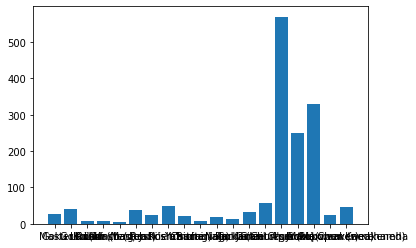

In [81]:
plt.bar(x = df_db_ts['Character'], height = df_db_ts['Power_Level'])

In [82]:
df_db_ts_head_4 = df_db_ts.head(4)

<BarContainer object of 4 artists>

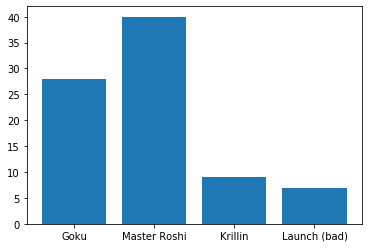

In [83]:
plt.bar(x= df_db_ts_head_4['Character'], height = df_db_ts_head_4['Power_Level'])

<BarContainer object of 19 artists>

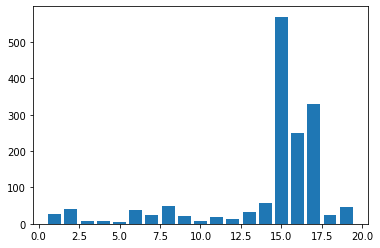

In [84]:
plt.bar(x = np.arange(1,20), height = df_db_ts['Power_Level'])

In [ ]:
# for the above plot, it looks like the np.arange (x,y) has to be the exact same for the number of entries in the data
# e.g., there were 19 characters/power levels in the tournament saga, and thus np.arange must be --> np.arange(1,20)

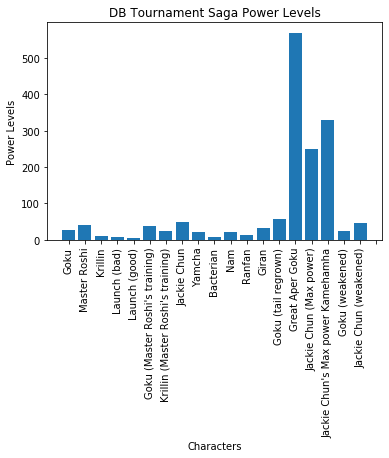

In [85]:
plt.bar(x = np.arange(1,20), height = df_db_ts['Power_Level'])
plt.title('DB Tournament Saga Power Levels')

plt.xticks(np.arange(1,21), df_db_ts['Character'], rotation=90)

plt.xlabel('Characters')
plt.ylabel("Power Levels")

plt.show()

In [ ]:
# Now let's use .hlines to make a lollipop chart

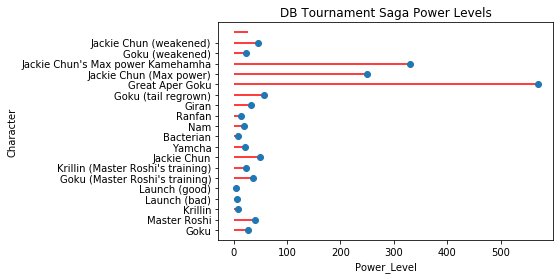

In [86]:
plt.hlines(y= np.arange(1,21), xmin= 0, xmax = df_db_ts['Power_Level'], color = 'red')
plt.plot(df_db_ts['Power_Level'], np.arange(1,20), 'o')   # This line of code allows us to get the blue bullet points, which makes them lollipops

plt.title('DB Tournament Saga Power Levels')

plt.yticks(np.arange(1,20), df_db_ts['Character'], rotation = 0)

plt.xlabel('Power_Level')
plt.ylabel('Character')
                                     
plt.show()                  

In [87]:
# Scatter Plot

In [ ]:
# I will practice it on the 'Using Pokemon Data.ipynb'



Pie Chart

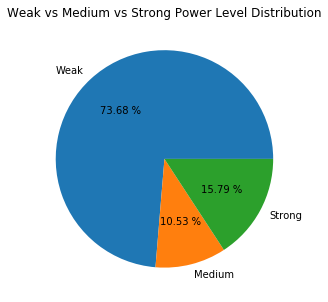

In [88]:
df_db_ts['Power_Level']

plt.figure(figsize = (5,5))
plt.title('Weak vs Medium vs Strong Power Level Distribution')

weak = df_db_ts.loc[df_db_ts['Power_Level'] < 50].count()[0]

medium = df_db_ts.loc[(df_db_ts['Power_Level'] >= 50) & (df_db_ts['Power_Level'] < 150)].count()[0]

strong = df_db_ts.loc[df_db_ts['Power_Level'] >= 150].count()[0]

labels = ['Weak', 'Medium', 'Strong']

plt.pie([weak, medium, strong], labels = labels, autopct = '%.2f %%')

plt.show()

In [89]:
# I want to make a comparison via box and whiskers
# Roshi and his students as a team, versus everyone else

#roshi = df_db_ts.loc[(df_db_ts['Character'].str.contains('Goku')) & (df_db_ts['Character'].str.contains('Launch'))]  # I want to add more than just 'Goku'
# this one above only gives me the ones for 'Goku'
roshi0 = df_db_ts.loc[df_db_ts['Character'].str.contains('Goku')]

roshi0

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
14,Goku,28.0,Tournament Saga,Dragon Ball
19,Goku (Master Roshi's training),37.0,Tournament Saga,Dragon Ball
27,Goku (tail regrown),57.0,Tournament Saga,Dragon Ball
28,Great Aper Goku,570.0,Tournament Saga,Dragon Ball
31,Goku (weakened),24.0,Tournament Saga,Dragon Ball


In [90]:
roshi1 = df_db_ts['Character'] == 'Goku'

roshi1

14     True
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
Name: Character, dtype: bool

In [ ]:
#Okay, let's compare the power levels of the people from the first tournament saga, to the following two. Use a box and whisker

In [91]:
df_ts2 = df.loc[df['Saga_or_Movie'].str.contains('Tien Shinhan Saga')]

df_ts2

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
62,Master Shen,120,Tien Shinhan Saga,Dragon Ball
63,Master Roshi,139,Tien Shinhan Saga,Dragon Ball
64,King Chappa,76,Tien Shinhan Saga,Dragon Ball
65,Yamcha,126,Tien Shinhan Saga,Dragon Ball
66,"Tien (suppressed, fighting Yamcha)",140,Tien Shinhan Saga,Dragon Ball
67,Krillin,130,Tien Shinhan Saga,Dragon Ball
68,Chaoitzu,106,Tien Shinhan Saga,Dragon Ball
69,Pamput,71,Tien Shinhan Saga,Dragon Ball
70,"Jackie Chun (suppressed, fighting Tien)",139,Tien Shinhan Saga,Dragon Ball
71,"Tien (suppressed, fighting Jackie Chun)",140,Tien Shinhan Saga,Dragon Ball


In [92]:
df_ts3 = df.loc[df['Saga_or_Movie'].str.contains('Piccolo Jr. Saga')]

df_ts3

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
101,Master Roshi,139,Piccolo Jr. Saga,Dragon Ball
102,Krillin,195,Piccolo Jr. Saga,Dragon Ball
103,Yamcha,162,Piccolo Jr. Saga,Dragon Ball
104,Tien,240,Piccolo Jr. Saga,Dragon Ball
105,Yajirobe,148,Piccolo Jr. Saga,Dragon Ball
106,Chiaotzu,137,Piccolo Jr. Saga,Dragon Ball
107,Cyborg Tao,210,Piccolo Jr. Saga,Dragon Ball
108,Piccolo (weighted),260,Piccolo Jr. Saga,Dragon Ball
109,Goku (weighted),265,Piccolo Jr. Saga,Dragon Ball
110,Chi-chi,130,Piccolo Jr. Saga,Dragon Ball


Box and Whisker

In [93]:
df_db_ts1 = df_db_ts['Power_Level']
df_db_ts2 = df_ts2['Power_Level']
df_db_ts3 = df_ts3['Power_Level']

In [94]:
print(df_db_ts1.dtype)
print(df_db_ts2.dtype)
print(df_db_ts3.dtype)

float64
object
object


In [95]:
print(df_db_ts1.dtype)

print(df_db_ts2.astype('float64'))

print(df_db_ts3.astype('float64'))

float64
62    120.0
63    139.0
64     76.0
65    126.0
66    140.0
67    130.0
68    106.0
69     71.0
70    139.0
71    140.0
72    180.0
73    180.0
74    180.0
75    985.0
Name: Power_Level, dtype: float64
101    139.0
102    195.0
103    162.0
104    240.0
105    148.0
106    137.0
107    210.0
108    260.0
109    265.0
110    130.0
111     90.0
112    331.0
113    325.0
114    740.0
Name: Power_Level, dtype: float64


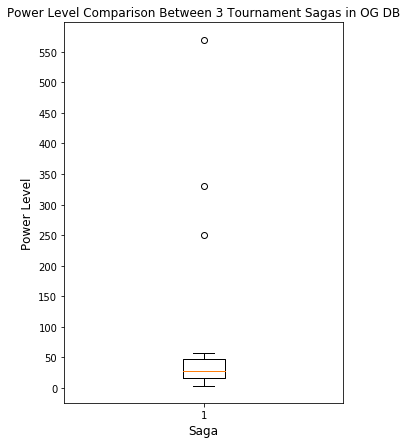

In [96]:
df_db_ts1
df_db_ts2
df_db_ts3

plt.figure(figsize = (5,7))
plt.title('Power Level Comparison Between 3 Tournament Sagas in OG DB')

plt.boxplot([df_db_ts1])

plt.yticks(np.arange(0,600,50))

plt.xlabel('Saga', fontdict = {'fontsize' : 12})
plt.ylabel('Power Level', fontdict = {'fontsize' : 12})

plt.show()